## 출처: [https://www.kaggle.com/code/devraai/exploring-pokmon-data-with-random-forest/notebook](https://www.kaggle.com/code/devraai/exploring-pokmon-data-with-random-forest/notebook)

In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # If only plt is imported

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# For inline plotting on Kaggle
%matplotlib inline

print('Libraries imported successfully.')

Libraries imported successfully.


Data Loading

In [2]:
#Load the dataset using pandas
data_path = 'pokedex.csv'
df = pd.read_csv(data_path, encoding = 'utf-8')

#Display the first few rows to check if the data is read correctly
df.head()

,id,name,height,weight,hp,attack,defense,s_attack,s_defense,speed,type,evo_set,info
0,1,bulbasaur,7,69,45,49,49,65,65,45,"{grass,poison}",1,A strange seed was planted on its back at birt...
1,2,ivysaur,10,130,60,62,63,80,80,60,"{grass,poison}",1,"When the bulb on its back grows large, it appe..."
2,3,venusaur,20,1000,80,82,83,100,100,80,"{grass,poison}",1,The plant blooms when it is absorbing solar en...
3,4,charmander,6,85,39,52,43,60,50,65,{fire},2,"Obviously prefers hot places. When it rains, s..."
4,5,charmeleon,11,190,58,64,58,80,65,80,{fire},2,"When it swings its burning tail, it elevates t..."


Data Cleaning and Preprocessing

In [3]:
#Check the occurrences of each Pokemon type
type_counts = df['type'].value_counts()
print("Original type count: ")
print(type_counts)

#Filter out types with less than 2 occurrences to avoid stratification errors
valid_types = type_counts[type_counts>=2].index
df = df[df['type'].isin(valid_types)].reset_index(drop=True)

print("\nFiltered data type counts: ")
print(df['type'].value_counts())

Original type count: 
type
{normal}          75
{water}           74
{grass}           47
{psychic}         39
{fire}            36
                  ..
{flying,water}     1
{poison,bug}       1
{dark,normal}      1
{ghost,dark}       1
{poison,ghost}     1
Name: count, Length: 203, dtype: int64

Filtered data type counts: 
type
{normal}            75
{water}             74
{grass}             47
{psychic}           39
{fire}              36
                    ..
{rock,dragon}        2
{rock,ice}           2
{electric,fairy}     2
{rock,fairy}         2
{steel,poison}       2
Name: count, Length: 145, dtype: int64


Exploratory Data Analysis

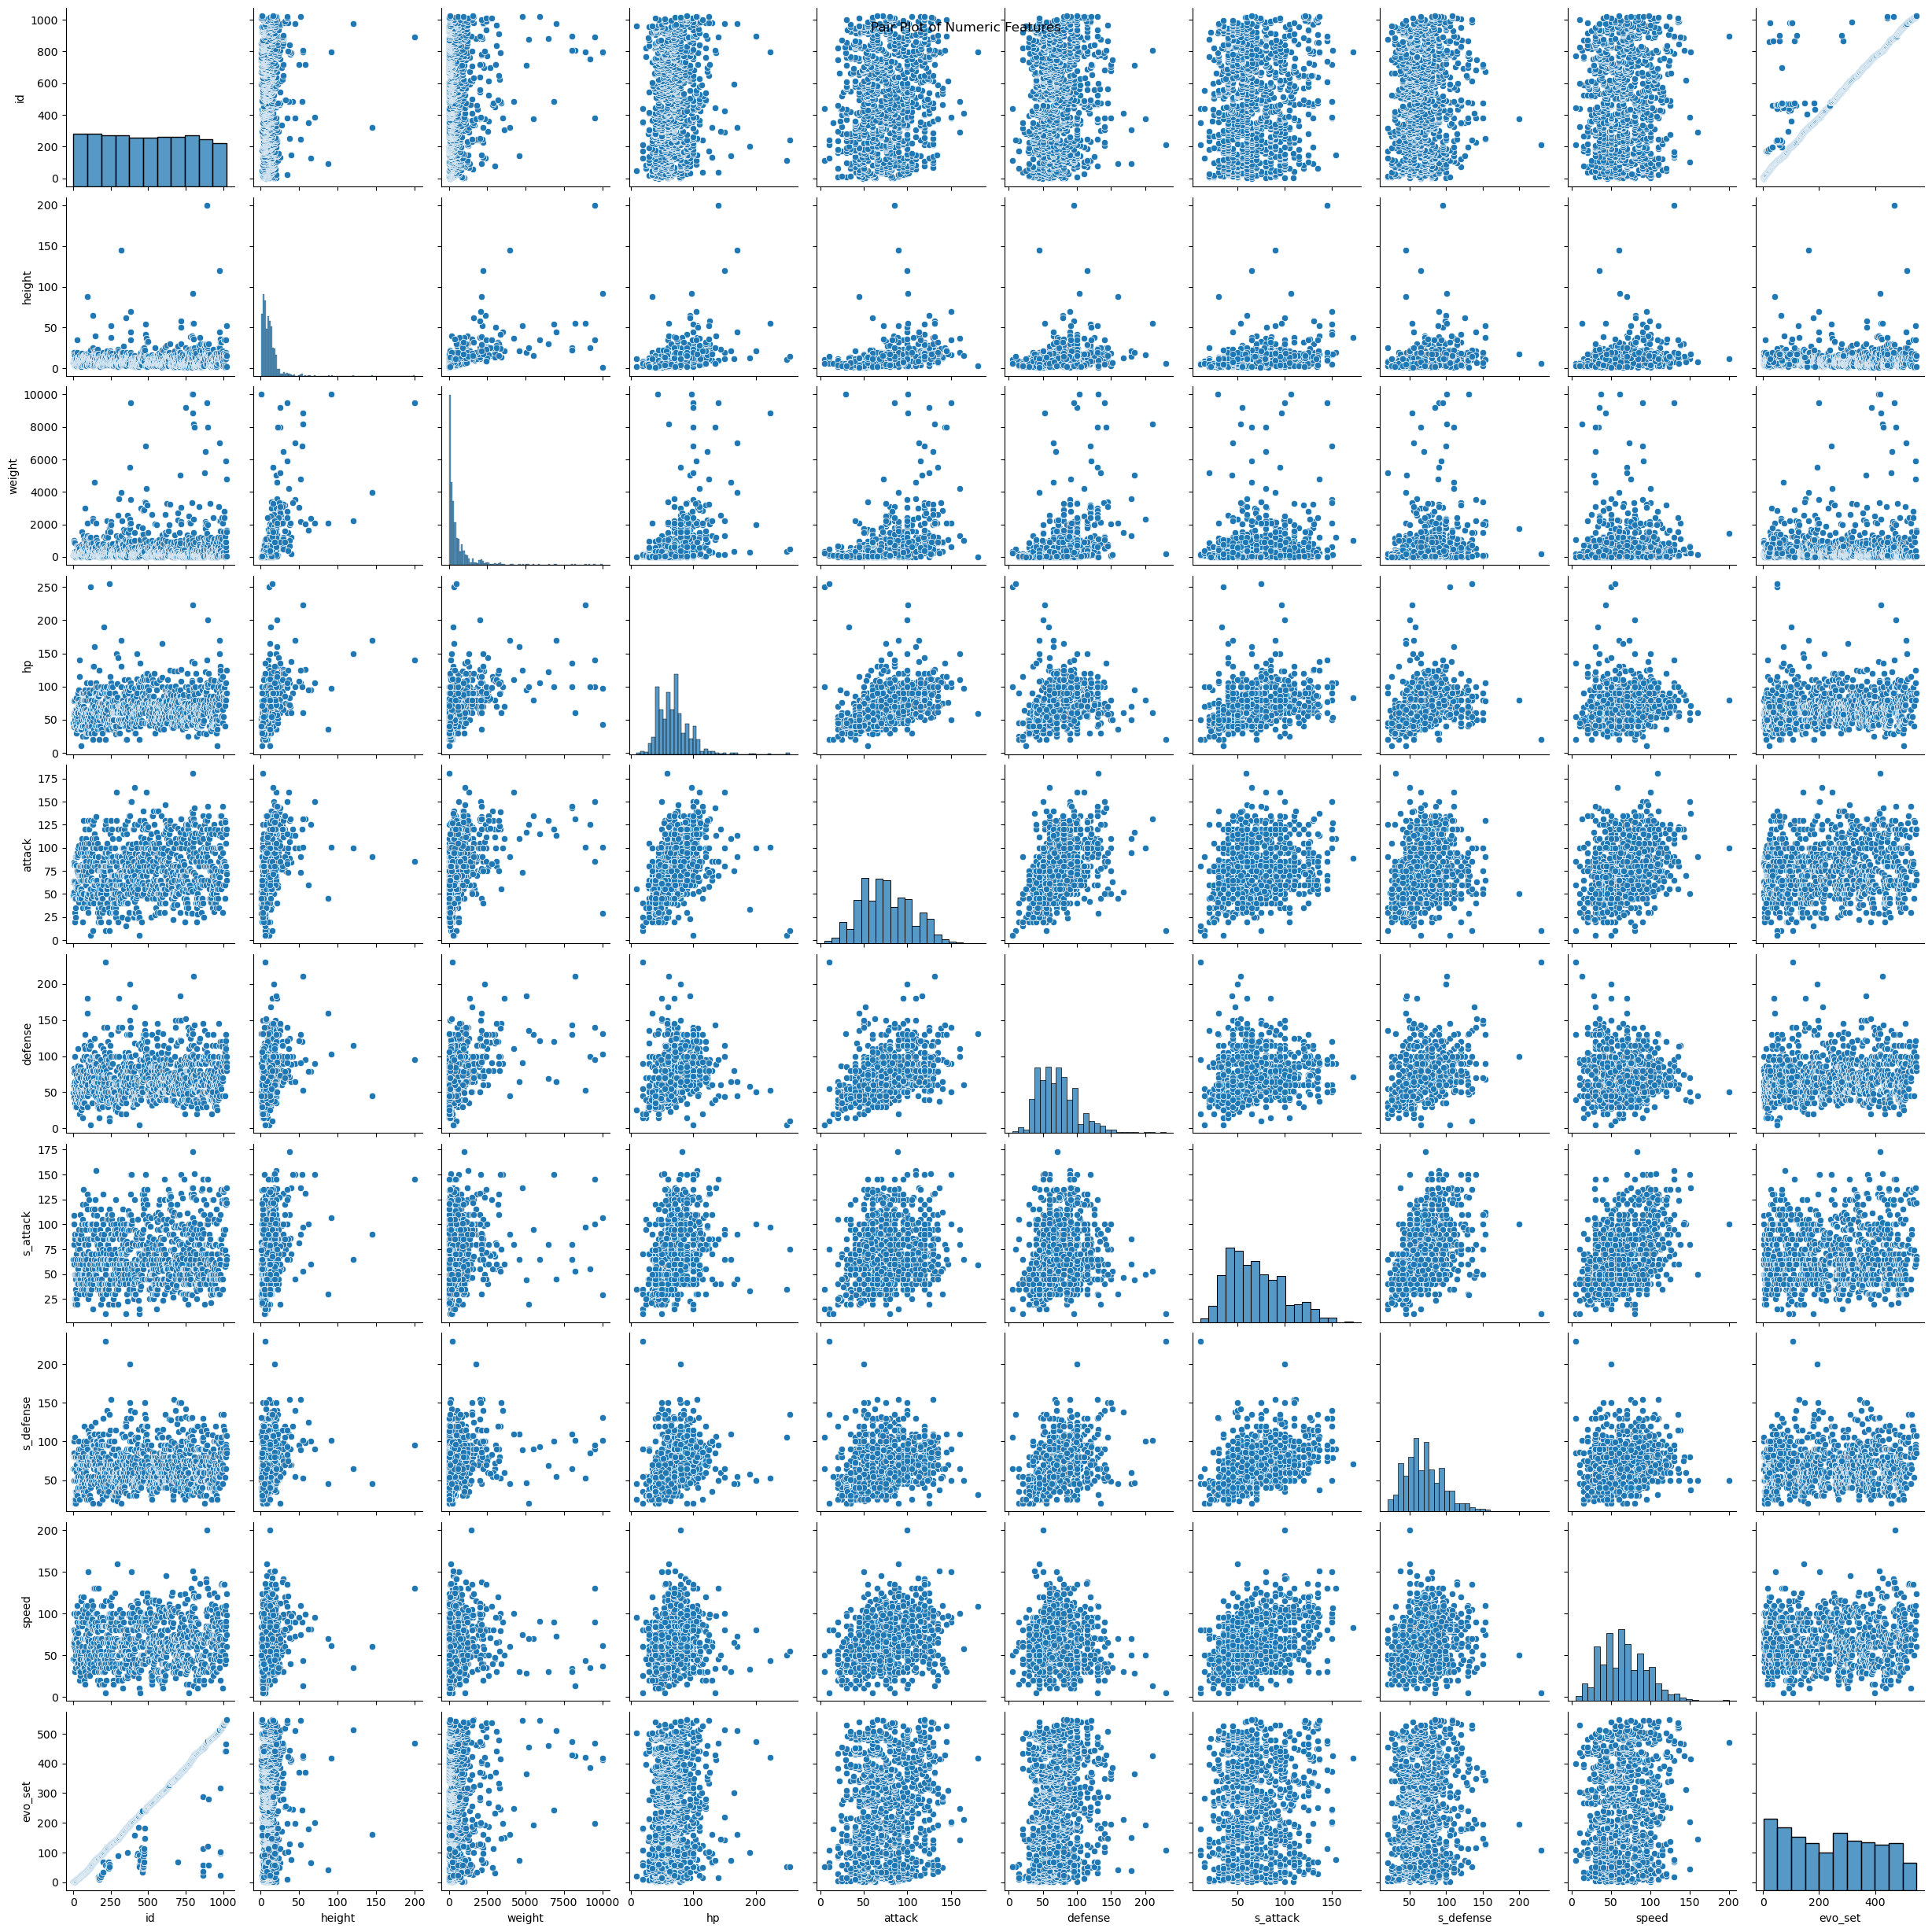

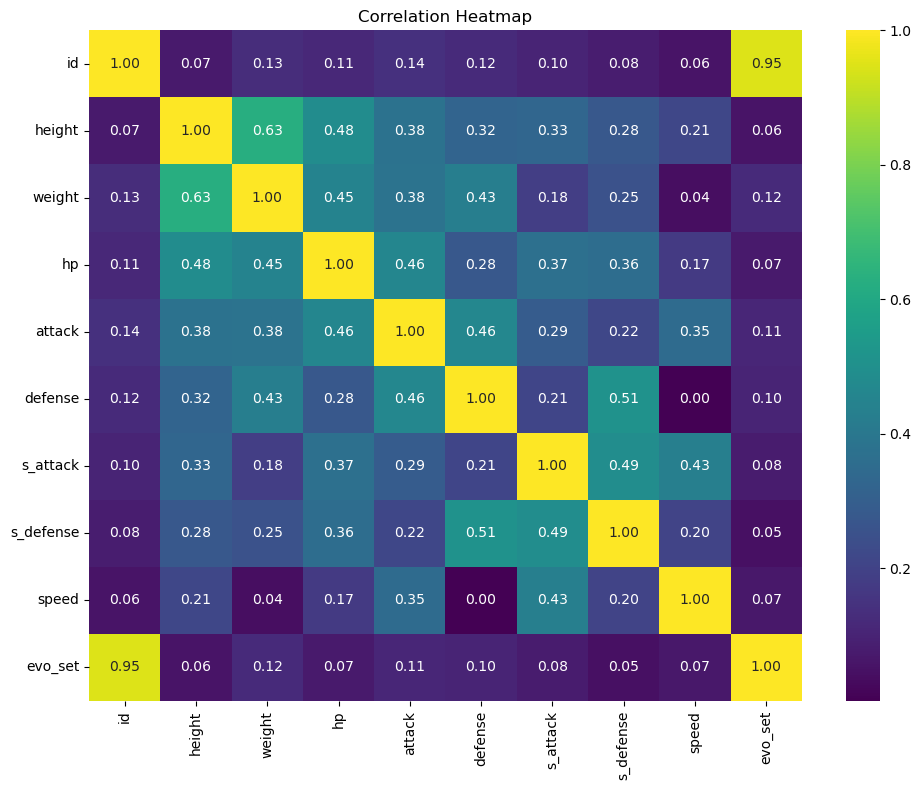

In [6]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Pair Plot for numeric features
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features')
plt.show()

# If there are at least 4 numeric columns, show a correlation heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot = True, cmap = 'viridis', fmt = '.2f')
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

Categoricla Data Visualizations

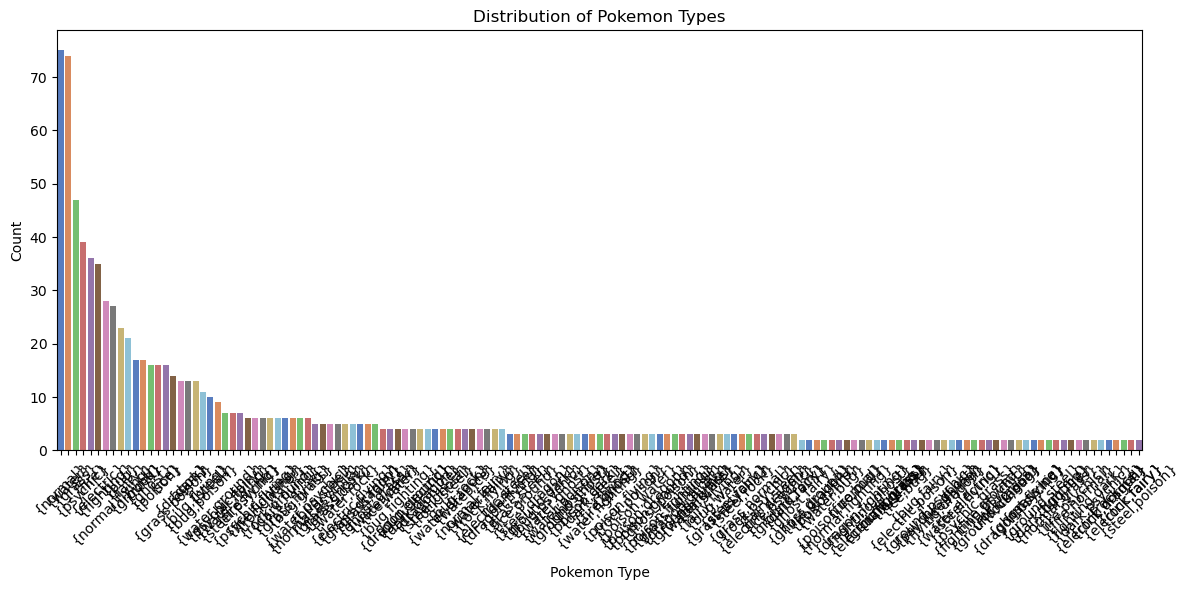

In [7]:
# Visualize the distribution of Pokemon types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='type', order = df['type'].value_counts().index, palette='muted')
plt.title('Distribution of Pokemon Types')
plt.xlabel("Pokemon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Predictive Modeling

Prediction Accuracy: 0.13


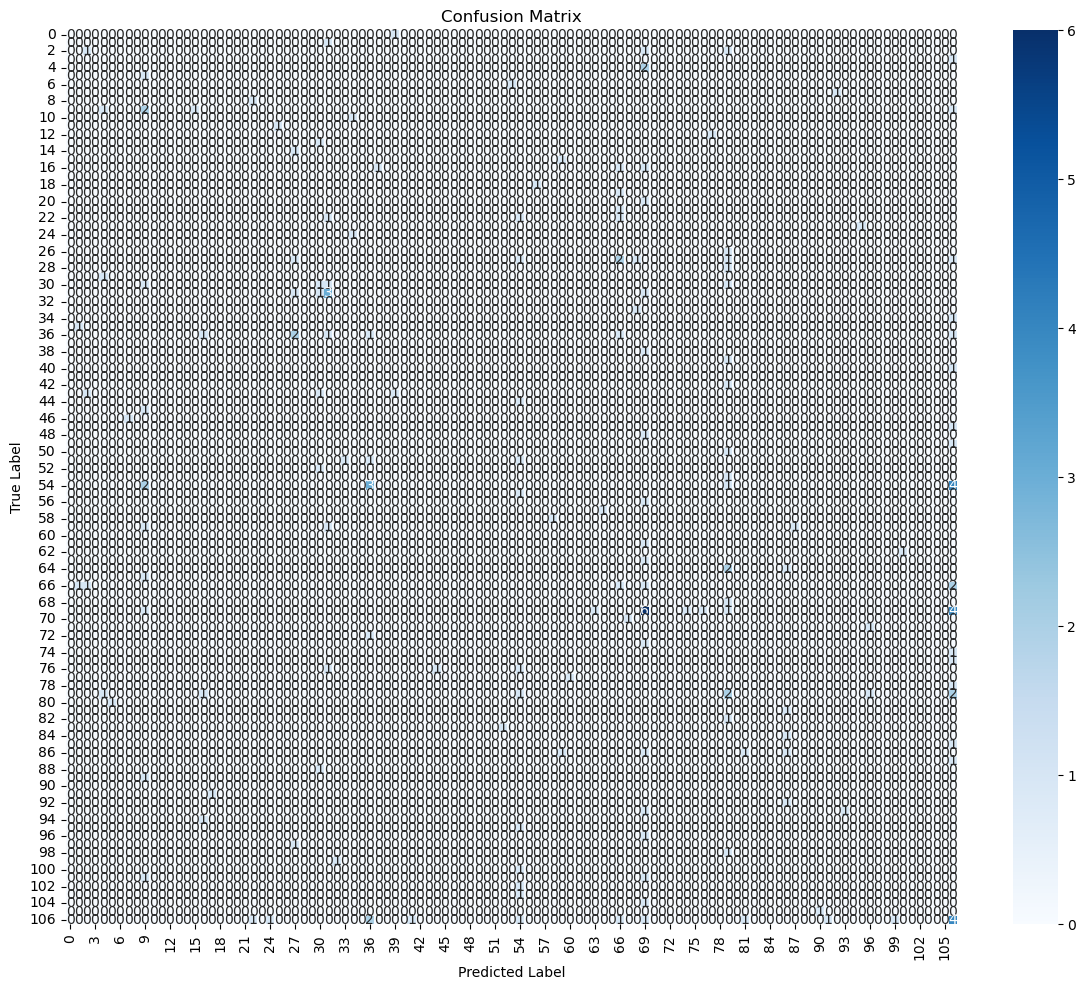

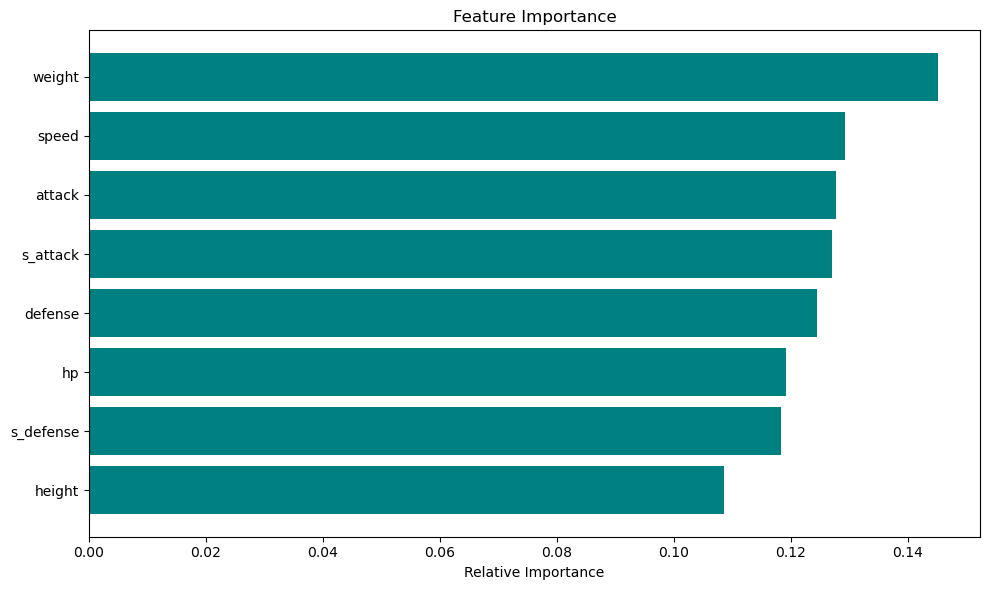

In [9]:
# Prepare feature matrix and target vector
feature_cols = ['height', 'weight', 'hp', 'attack', 'defense', 's_attack', 's_defense', 'speed']
X = df[feature_cols]
y = df['type']

# Encode the target variable using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Permutation importance-like view using feature_importances_
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()